(520, 520)


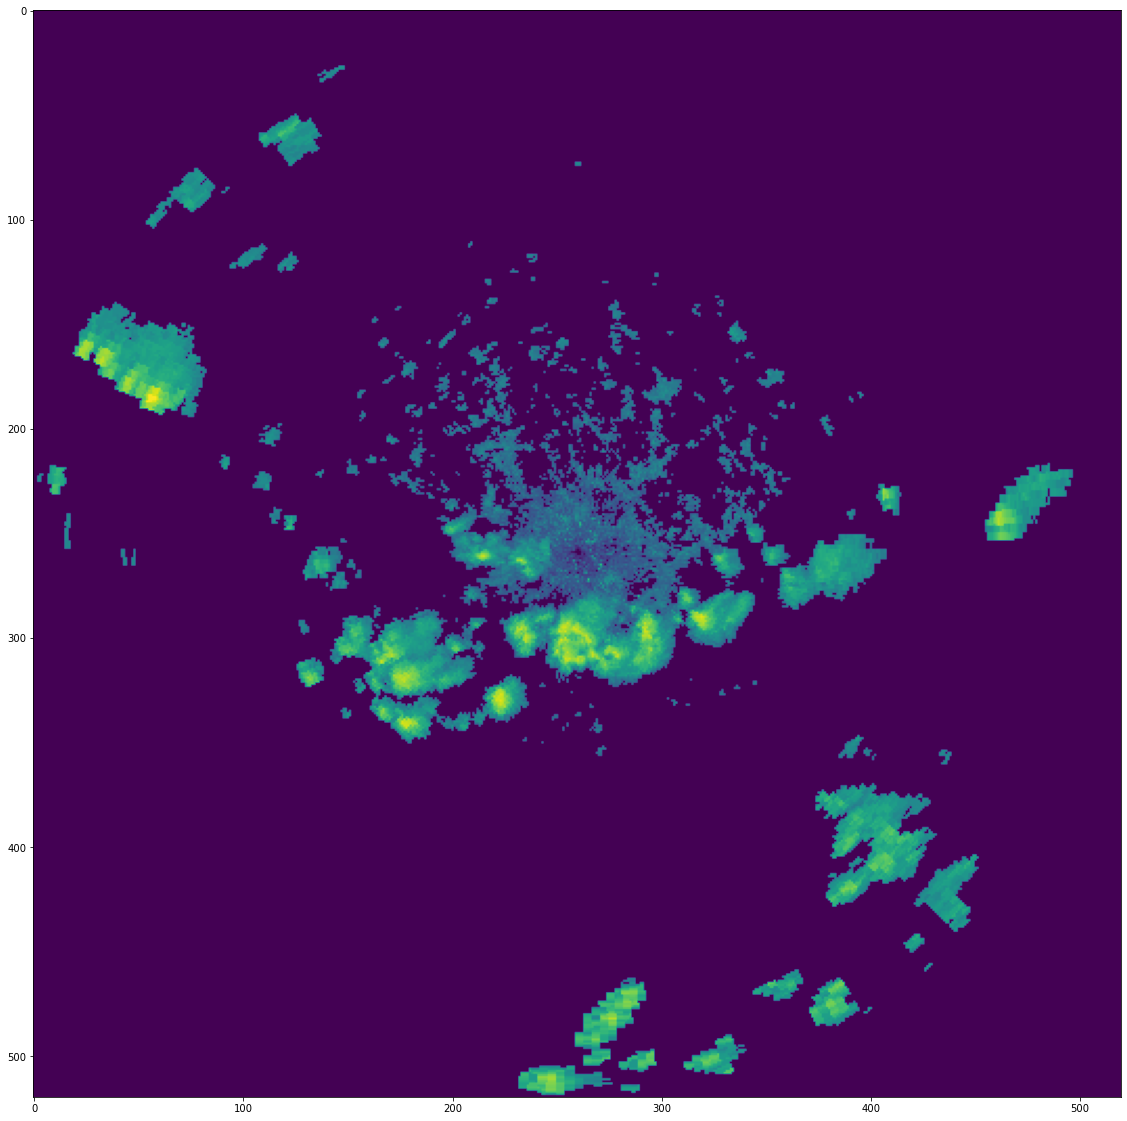

(25148, 2)


In [1]:
#Kmeans Program Complete


import wradlib as wrl
import random
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (20,20))

file_path = "C:\\Users\\manan\\OneDrive\\Desktop\\data\\BHP190610110229.MAXSU60"
fcontent = wrl.io.read_iris(file_path)
data_mat = fcontent['data'][0][0]

data_mat=data_mat[200:,:520]

print(data_mat.shape)

plt.imshow(data_mat)

points = []
k=3

for indx,x in enumerate(data_mat):
    for indy,y in enumerate(x):
        if y!=95.5 and y!=-32:
            points.append(list([indx,indy]))
        if y==95.5:
            data_mat[indx][indy] = -32

plt.imshow(data_mat)

plt.show()

def plotpoints(data,labels,centroids,k,save = False):
    color = ['red','blue','green','yellow','black','purple','grey']
    
    plt.figure(figsize = (20,20))
    
    for i in range(k):
        x = data[labels==i][:,0]
        y = data[labels==i][:,1]
        x = x[::-1]
        y = y[::-1]
        plt.scatter(x,y,s=1,c=color[i])

    for i in centroids:
        plt.scatter(i[0],i[1],s=100,c='orange')
    
    if save:
        plt.savefig('KMeans.png')
    plt.show()

data = np.array(points)

print(data.shape)

np.random.seed(0)

previous_centroids = data[np.random.choice(len(data), k, replace=False)]
current_seeds = []
labels = []


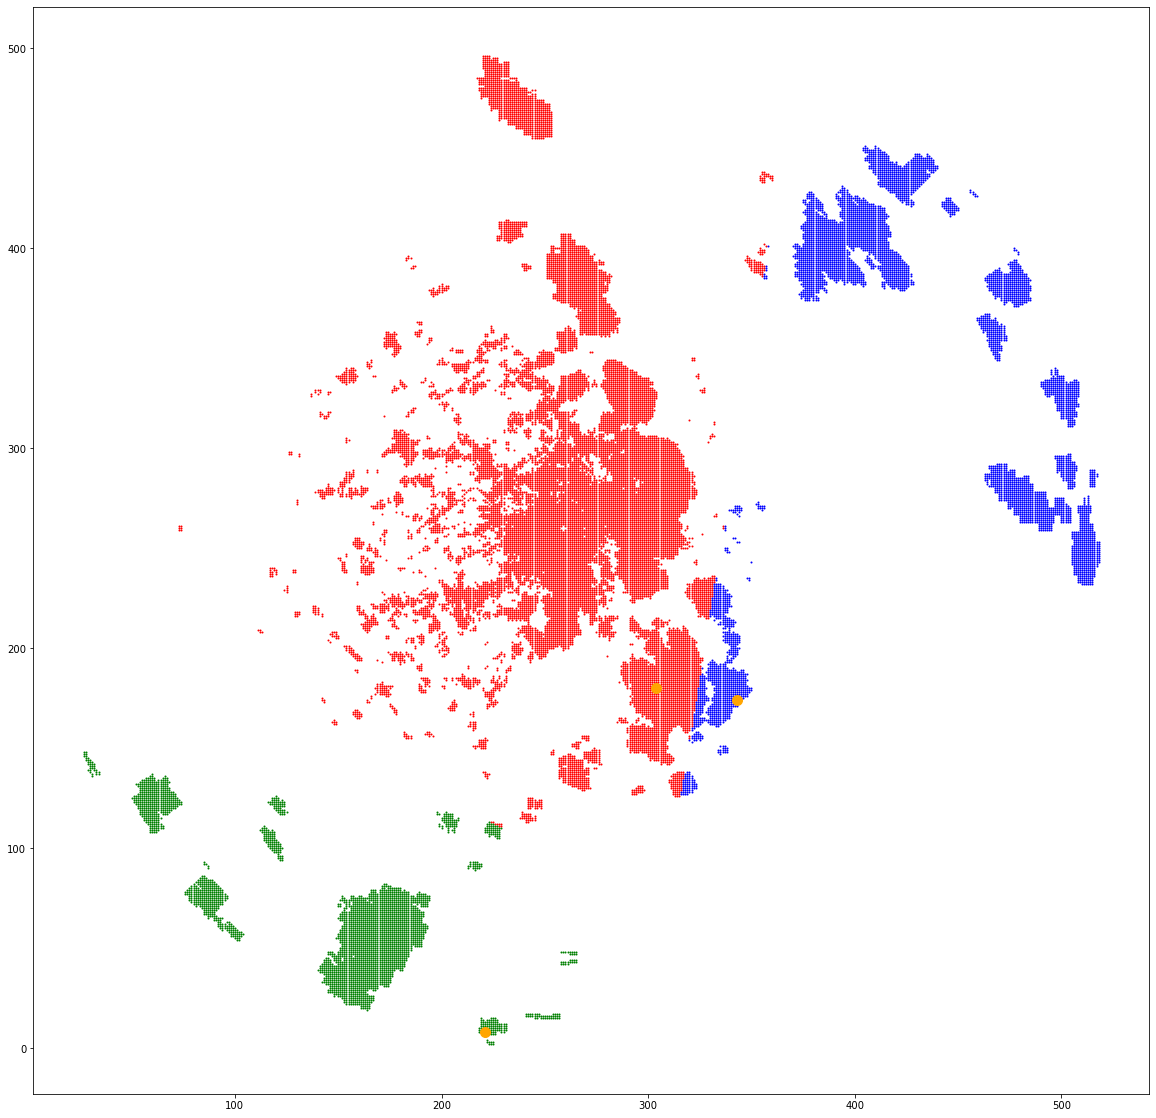

[[304 180]
 [343 174]
 [221   8]]


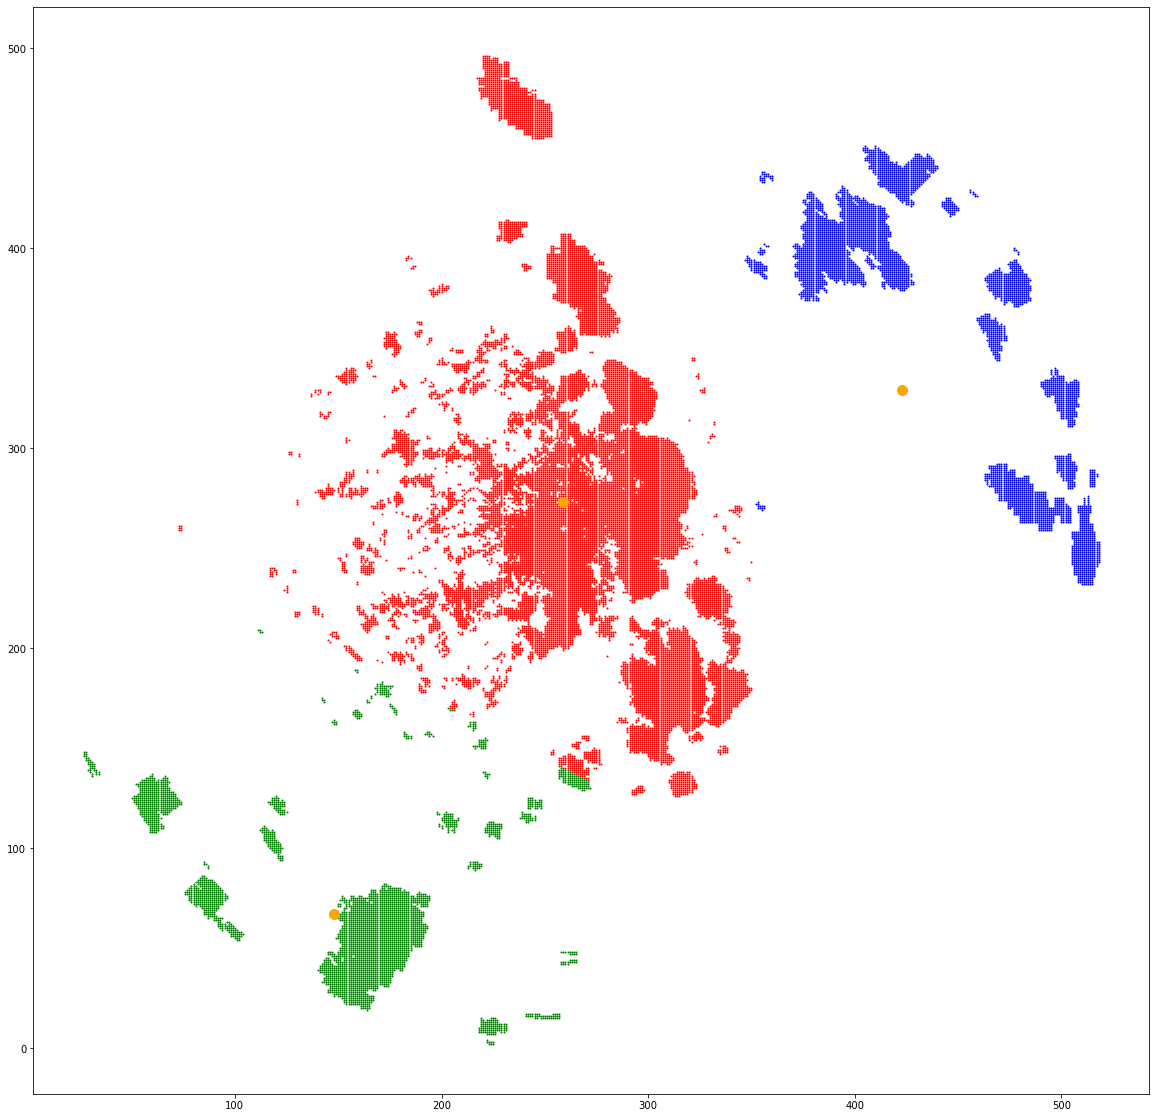

[[259. 273.]
 [423. 329.]
 [148.  67.]]


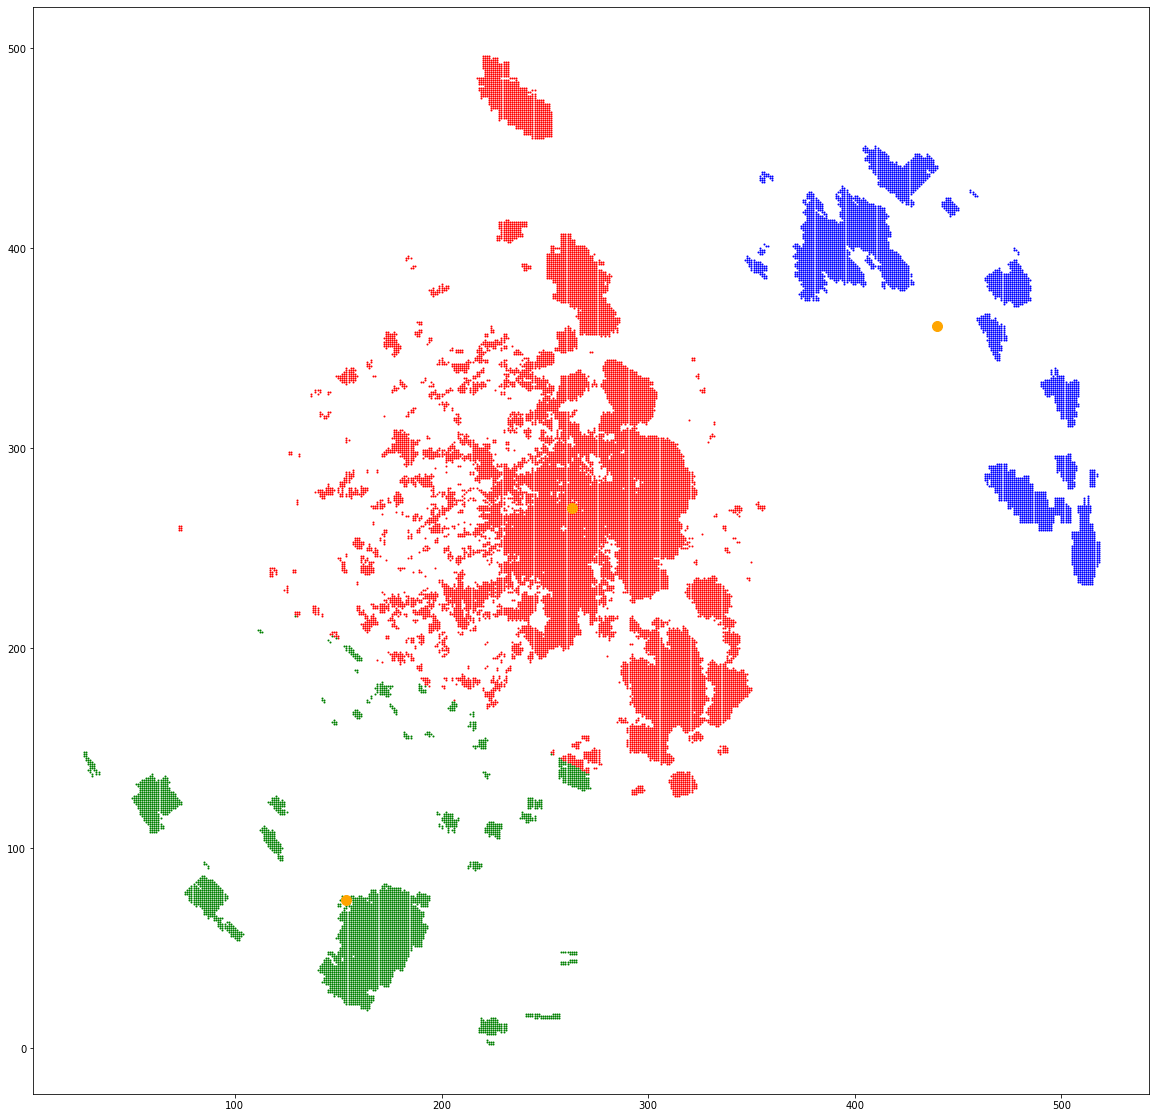

[[263. 270.]
 [440. 361.]
 [154.  74.]]


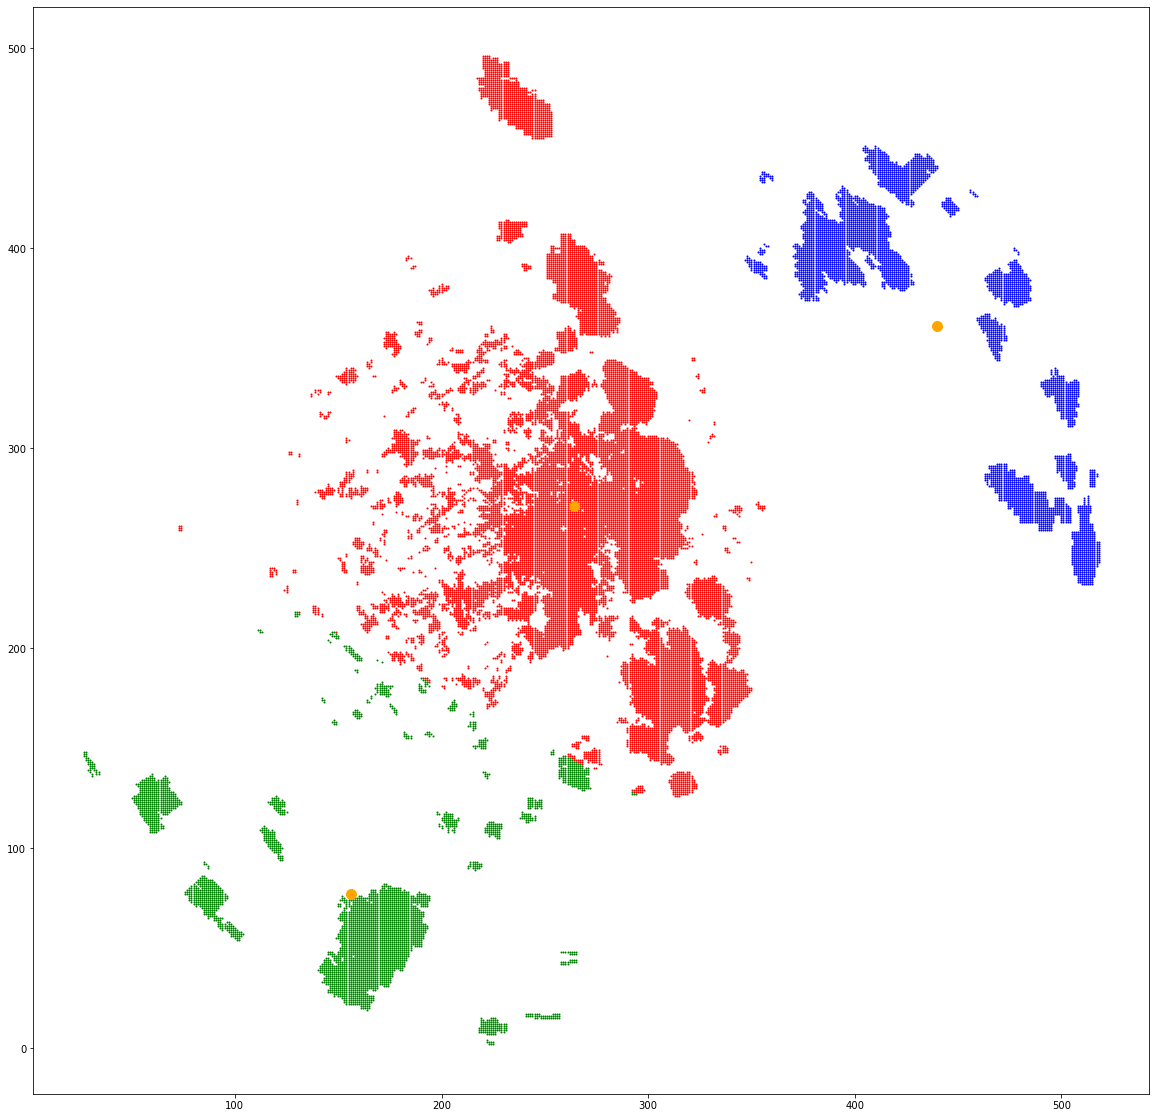

[[264. 271.]
 [440. 361.]
 [156.  77.]]


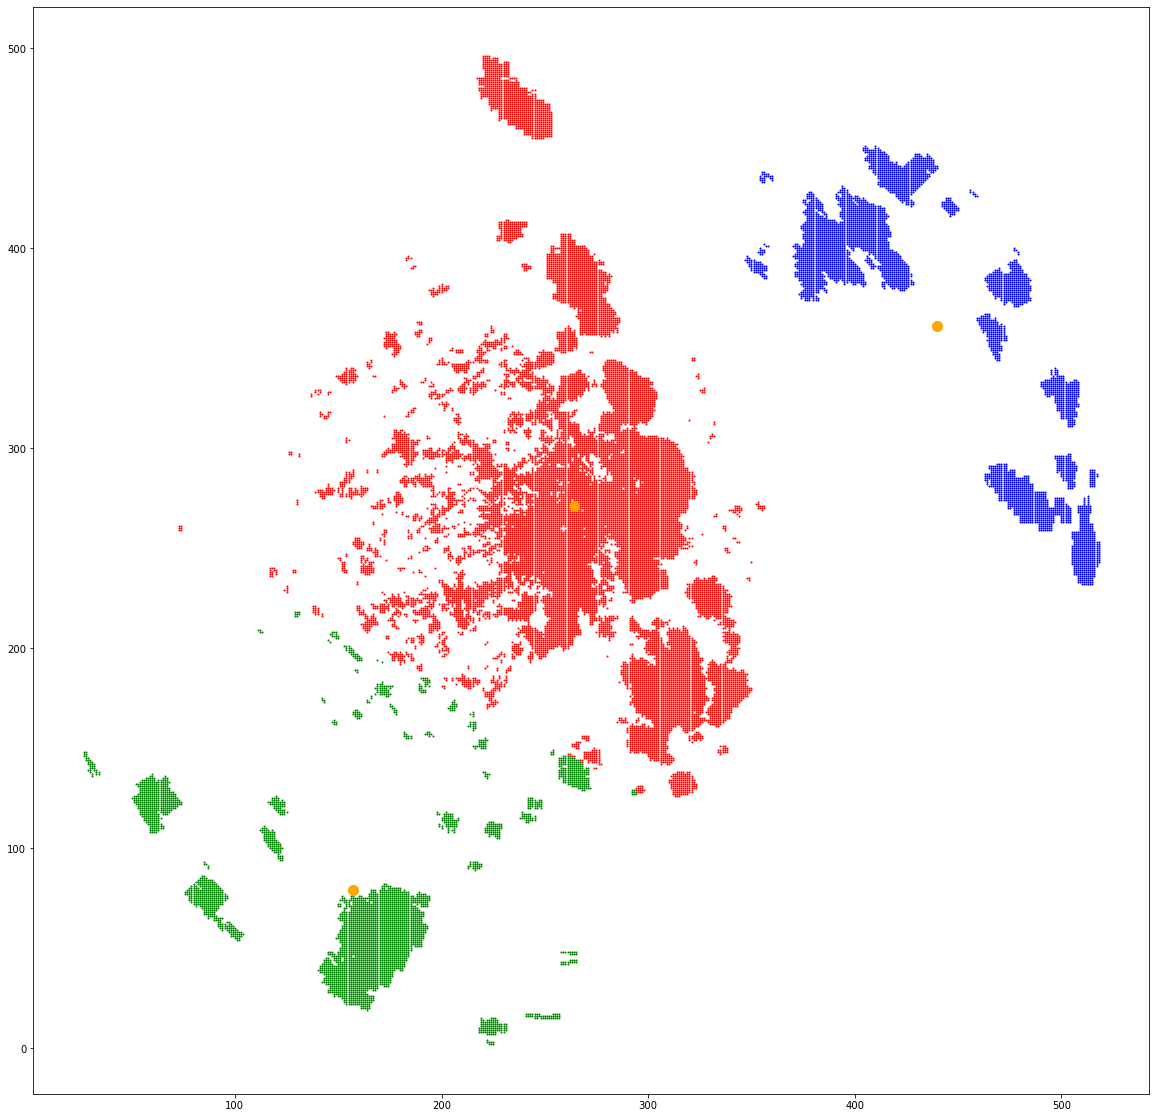

[[264. 271.]
 [440. 361.]
 [157.  79.]]


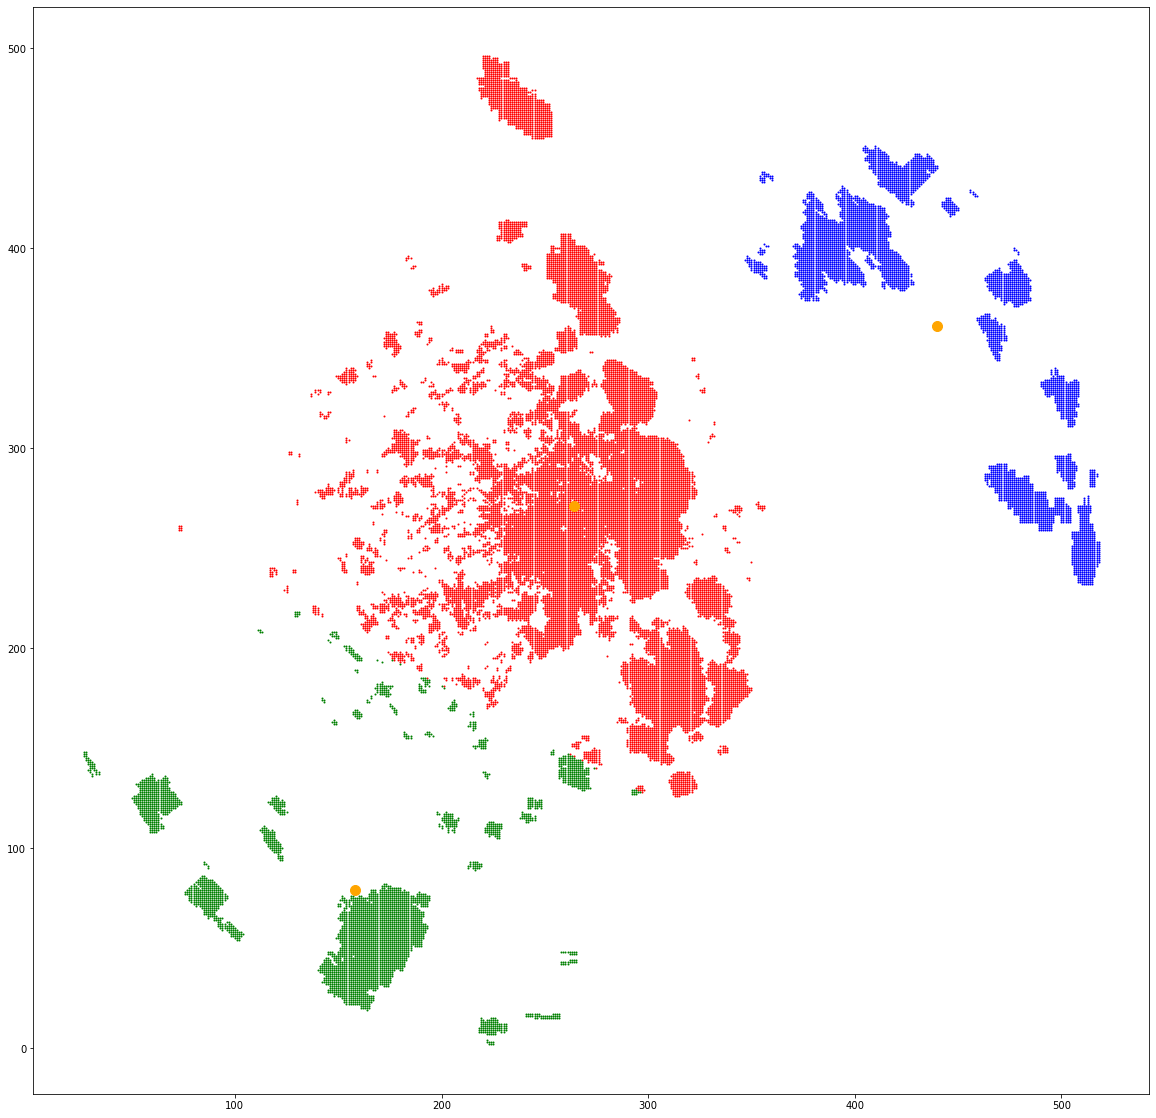

[[264. 271.]
 [440. 361.]
 [158.  79.]]


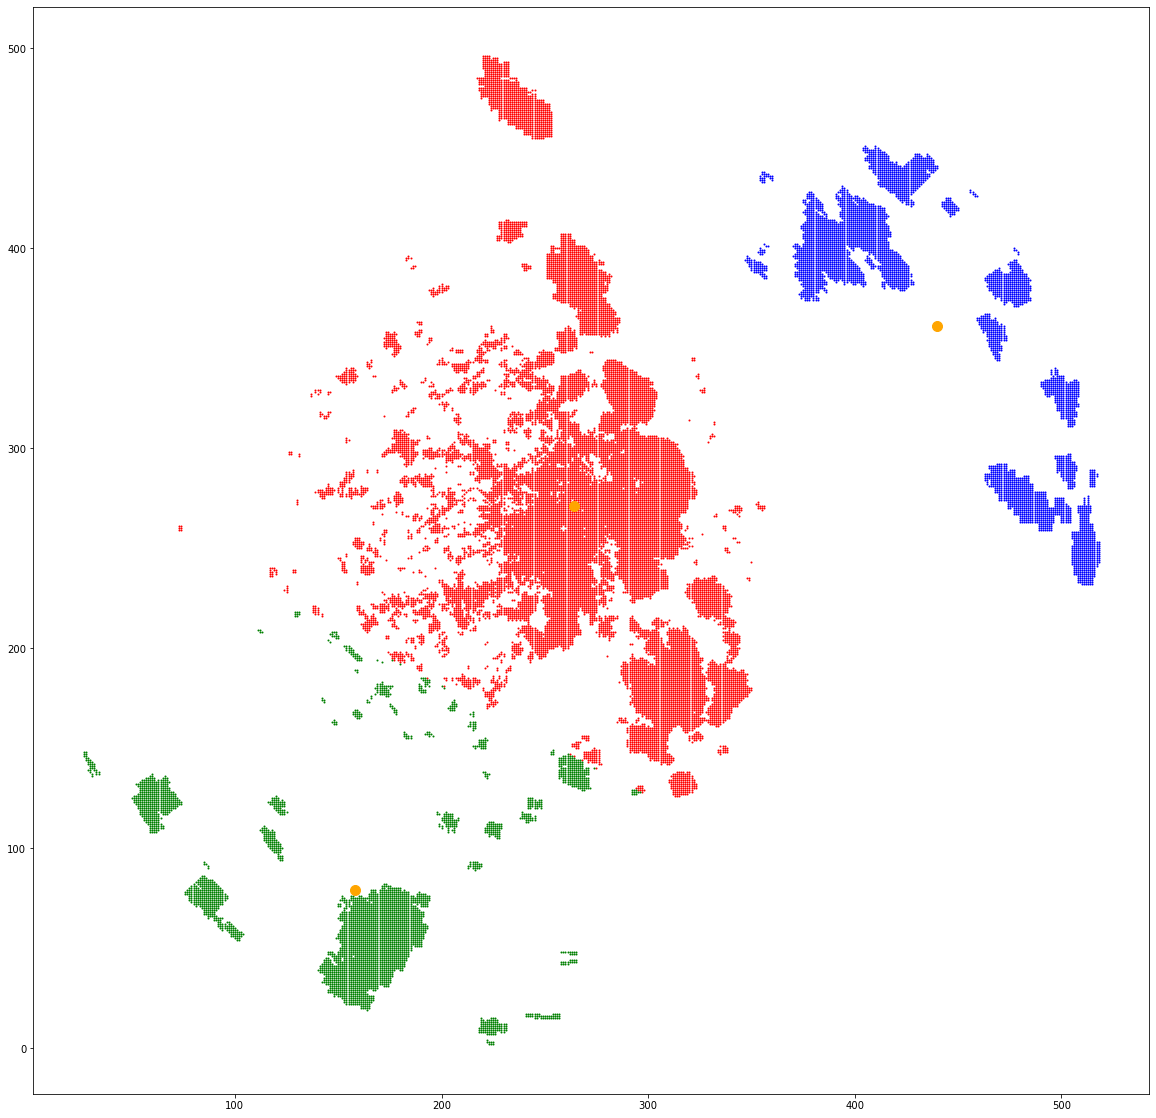

In [2]:
while True:
    labels = np.array([np.argmin(np.sqrt(np.sum((previous_centroids - data[i])**2, axis=1))) for i in range(len(data))])
    plotpoints(data,labels,previous_centroids,k)
    print(previous_centroids)
    current_centroids = np.array([np.mean(data[labels == j], axis=0) for j in range(k)])
    
    for ind,centroid in enumerate(current_centroids):
        for i,val in enumerate(centroid):
            current_centroids[ind][i] = int(val)
    
    if np.all(previous_centroids == current_centroids):
        break;
    previous_centroids = current_centroids

plotpoints(data,labels,previous_centroids,k,True)